In [24]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [26]:
n_class = 10
X, y = load_digits(n_class=n_class , return_X_y=True)

In [3]:
X.shape

(1797, 64)

## Ce dataset contient 1797 exemples et 64 caracteristiques. Il represente des images de chiffre de 0 à 9 la tache sous jaccente est une tache de classification d'images

# 2. Implémentez les fonctions permettant :

In [4]:
def onehot_encoding(y, n_class):
    n = y.shape[0]
    y_one = np.zeros((n, n_class))
    for i in range(n):
       y_one[i, y[i]] = 1
    return y_one

In [5]:
def softmax(z):
    z -= np.max(z,axis=1, keepdims=True) # computational trick for numerical stability
    som=np.sum(np.exp(z))
    sm=np.exp(z) / som
    return sm

In [6]:
def get_prob_pred(X, W):
    z=X@W
    probs=np.max(softmax(z),axis=1)
    preds=np.argmax(softmax(z),axis=1)
    return probs , preds

# 4. Implémentez maintenant une fonction qui calcule la fonction de coût et le gradient.

In [7]:
def fonct_cout(X,Y,W,lambdaa):
    n=X.shape[0]
    z=X@W
    Y_pred=softmax(z)
    return  -np.sum(Y * np.log(Y_pred)) / n + (lambdaa / 2) * np.sum(W**2)
    

In [8]:
def gradient(X,Y,W,lambdaa):
    n=X.shape[0]
    z=X@W
    Y_pred=softmax(z)
    return  (-1/n) * (X.T @ (Y - Y_pred)) + lambdaa * W

In [9]:
def step_backtrak(X,y,w,direction,step,beta,lamb):
    c=1e-4
    f_x=fonct_cout(X,y,w,lamb)
    while(fonct_cout(X,y,w+step*direction,lamb)>f_x-c*step*np.sum(direction*direction)) :
        step=step*beta
    return step

In [10]:
def logreg_descent(X, y, learning_rate =1e-3,lamb=0.01, max_iter =1000,backtrak=True):
        n, d = X.shape
        X = np.concatenate ((X, np.ones((n, 1))), axis =1)
        w0 = np.random.randn(d+1,n_class)
        step = learning_rate
        beta = 0.9 
        cost=[]
        iteration=0
        Y=onehot_encoding(y,n_class)
        direction=-gradient(X, Y, w0,lamb)
        if backtrak==True:
           step=step_backtrak(X,Y,w0,direction,step,beta,lamb)
        w=w0+step*direction
        cost.append(fonct_cout(X, Y, w0,lamb))
        while np.linalg.norm(gradient(X, Y, w,lamb)) > 1e-3 and iteration<max_iter:
            direction=-gradient(X, Y, w,lamb)
            if backtrak==True:
                step=step_backtrak(X,Y,w,direction,step,beta,lamb)
            w=w+step*direction
            iteration+=1
            cost.append(fonct_cout(X, Y, w,lamb))
        
        return cost,w[:-1,:]

# Je separe les données en un ensemble d'entrainement et de test pour pouvoir estimer l'erreur reelle

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,stratify=y)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [12]:
cost,param=logreg_descent(X_train, Y_train, learning_rate =1e-3,lamb=2,max_iter =3000)

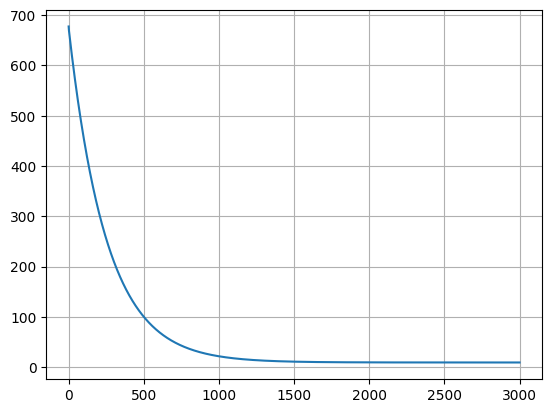

In [13]:
plt.plot(cost)
plt.grid()

In [14]:
_,pred=get_prob_pred(X_test, param)

In [22]:
_,pred=get_prob_pred(X_test, param)
taux=sum(np.array([1 if pred[i]==Y_test[i] else 0 for i in range(len(Y_test))]))/len(Y_test)
taux

np.float64(0.8666666666666667)

In [16]:
lambdas=[0,0.1,0.01,1,2,5]
list_costs=[]
list_taux=[]
for l in lambdas:
    cost,param=logreg_descent(X_train, Y_train, learning_rate =1e-3,lamb=l,max_iter =3000)
    list_costs.append(cost)
    _,pred=get_prob_pred(X_test, param)
    taux=sum(np.array([1 if pred[i]==Y_test[i] else 0 for i in range(len(Y_test))]))/len(Y_test)
    list_taux.append(taux)

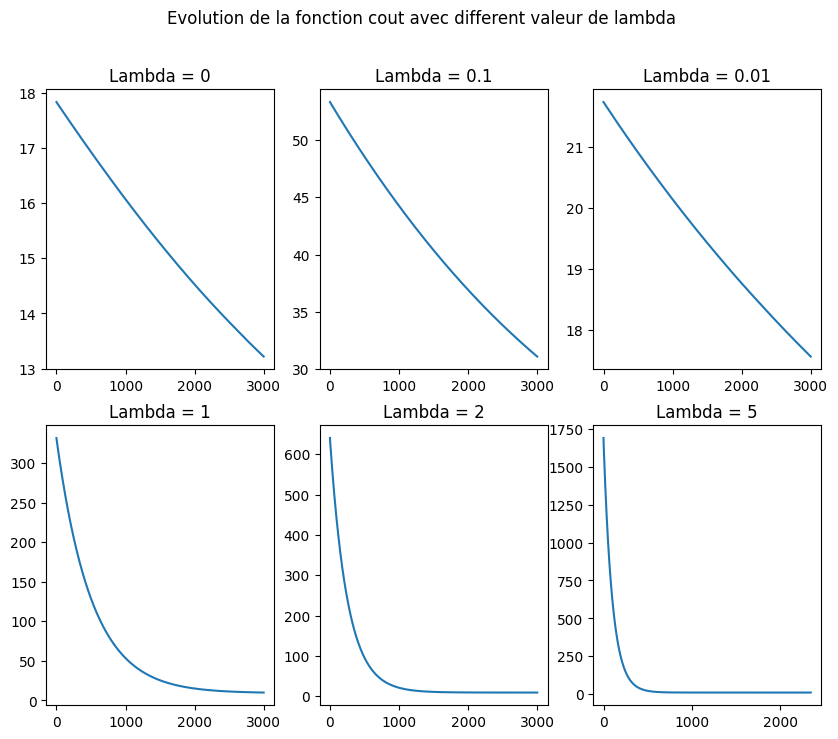

In [23]:
plt.subplots(2,3,figsize=(10,8))
plt.suptitle('Evolution de la fonction cout avec different valeur de lambda')
for i in range(0,6):
  plt.title(f'Lambda = {lambdas[i-1]}')
  plt.subplot(2,3,i+1)
  plt.plot(list_costs[i])

## On peut remarquer  que plus lambda est grand plus le modele converge beaucoup plus vite. La regulation permet de penaliser les modele complexe du coup plus le lambda est grand moins le modele devient complexe et converge plus rapidement

Text(0.5, 0, 'Lambdas')

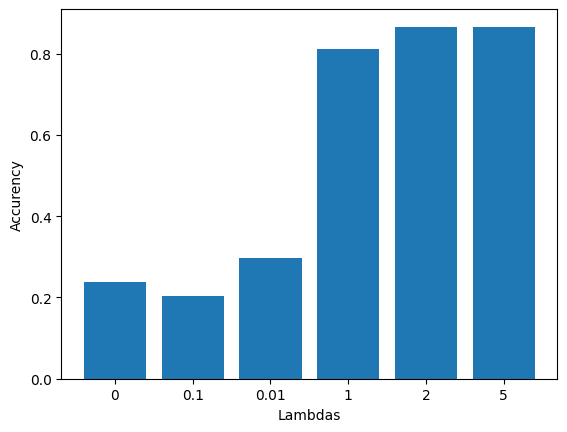

In [21]:
plt.bar(['0','0.1','0.01','1','2','5'],list_taux)
plt.ylabel('Accurency')
plt.xlabel('Lambdas')

## On voit que le taux de bonne calassification augmente en fonction de lambda . Avec un faible lambda le modele le modele donne de faible performance en generalisation

In [25]:
clf=LogisticRegression()
clf.fit(X_train,Y_train)
classe_predi=clf.predict(X_test)
taux=np.array([1 if classe_predi[i]==Y_test[i] else 0 for i in range(len(Y_test))])
print(f'Taux de bonne classification = {np.round(taux.mean() *100,3)}% Ecart-type = {np.round(taux.std(),3)}')

Taux de bonne classification = 96.667% Ecart-type = 0.18
